In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

df = pd.read_csv(r'D:\TUGAS-TUGAS ANGGUN (SK)\Semester 3\Data mining\HeartDiseaseTrain-Test.csv')

In [3]:
# Menampilkan 5 baris pertama
print("5 Baris Pertama:")
print(df.head())

# Menampilkan 5 baris terakhir
print("\n5 Baris Terakhir:")
print(df.tail())

5 Baris Pertama:
   age     sex chest_pain_type  resting_blood_pressure  cholestoral  \
0   52    Male  Typical angina                     125          212   
1   53    Male  Typical angina                     140          203   
2   70    Male  Typical angina                     145          174   
3   61    Male  Typical angina                     148          203   
4   62  Female  Typical angina                     138          294   

      fasting_blood_sugar               rest_ecg  Max_heart_rate  \
0    Lower than 120 mg/ml  ST-T wave abnormality             168   
1  Greater than 120 mg/ml                 Normal             155   
2    Lower than 120 mg/ml  ST-T wave abnormality             125   
3    Lower than 120 mg/ml  ST-T wave abnormality             161   
4  Greater than 120 mg/ml  ST-T wave abnormality             106   

  exercise_induced_angina  oldpeak        slope vessels_colored_by_flourosopy  \
0                      No      1.0  Downsloping                   

In [4]:
# Menampilkan informasi tentang dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   age                            1025 non-null   int64  
 1   sex                            1025 non-null   object 
 2   chest_pain_type                1025 non-null   object 
 3   resting_blood_pressure         1025 non-null   int64  
 4   cholestoral                    1025 non-null   int64  
 5   fasting_blood_sugar            1025 non-null   object 
 6   rest_ecg                       1025 non-null   object 
 7   Max_heart_rate                 1025 non-null   int64  
 8   exercise_induced_angina        1025 non-null   object 
 9   oldpeak                        1025 non-null   float64
 10  slope                          1025 non-null   object 
 11  vessels_colored_by_flourosopy  1025 non-null   object 
 12  thalassemia                    1025 non-null   o

In [5]:
# Cek nilai missing (hilang)
missing_values = df.isnull().sum()
print("Nilai Missing di setiap kolom:")
print(missing_values)

Nilai Missing di setiap kolom:
age                              0
sex                              0
chest_pain_type                  0
resting_blood_pressure           0
cholestoral                      0
fasting_blood_sugar              0
rest_ecg                         0
Max_heart_rate                   0
exercise_induced_angina          0
oldpeak                          0
slope                            0
vessels_colored_by_flourosopy    0
thalassemia                      0
target                           0
dtype: int64


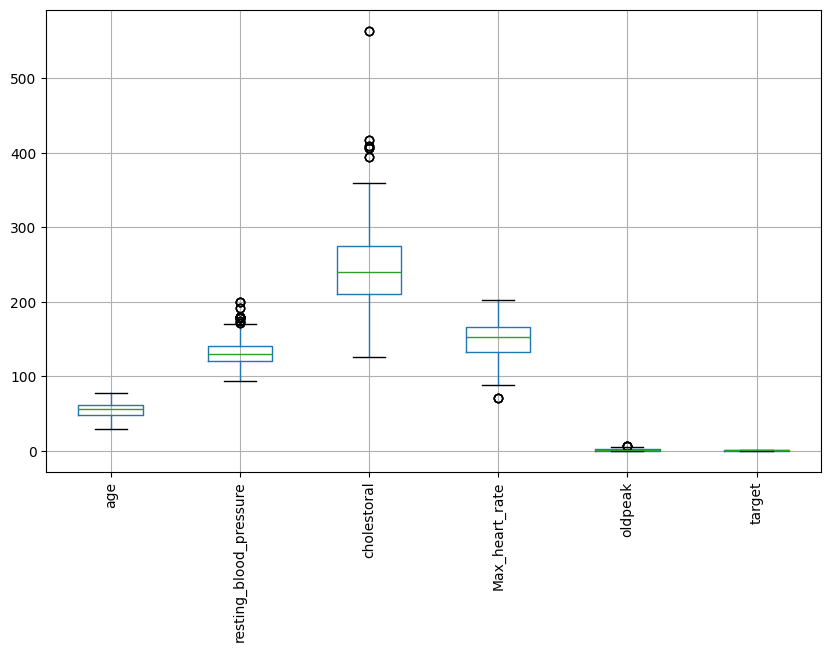

In [6]:
# outlier
import matplotlib.pyplot as plt

# Membuat boxplot untuk setiap kolom numerik
df.boxplot(figsize=(10, 6))
plt.xticks(rotation=90)  # Memutar label kolom agar tidak bertumpuk
plt.show().


In [7]:
import numpy as np

# Menghitung Z-score
from scipy import stats

z_scores = np.abs(stats.zscore(df.select_dtypes(include=[np.number])))
outliers = (z_scores > 3).sum(axis=0)
print("Jumlah outliers di setiap kolom numerik:")
print(outliers)


Jumlah outliers di setiap kolom numerik:
age                        0
resting_blood_pressure     7
cholestoral               13
Max_heart_rate             4
oldpeak                    7
target                     0
dtype: int64


In [17]:

from scipy import stats


# Memilih hanya kolom numerik
numerik_df = df.select_dtypes(include=[float, int])

# Menghitung mean
mean = numerik_df.mean()
print("Mean:")
print(mean)

# Menghitung median
median = numerik_df.median()
print("\nMedian:")
print(median)

# Menghitung mode
mode = numerik_df.mode().iloc[0]  # Mengambil mode pertama jika ada beberapa
print("\nMode:")
print(mode)

# Menghitung standar deviasi
std_dev = numerik_df.std()
print("\nStandar Deviasi:")
print(std_dev)

# Menghitung variansi
variance = numerik_df.var()
print("\nVariansi:")
print(variance)

# Menghitung skewness (kemiringan distribusi)
skewness = numerik_df.skew()
print("\nSkewness:")
print(skewness)

# Menghitung kurtosis (keruncingan distribusi)
kurtosis = numerik_df.kurtosis()
print("\nKurtosis:")
print(kurtosis)

Mean:
age                        54.434146
resting_blood_pressure    131.611707
cholestoral               246.000000
Max_heart_rate            149.114146
oldpeak                     1.071512
target                      0.513171
dtype: float64

Median:
age                        56.0
resting_blood_pressure    130.0
cholestoral               240.0
Max_heart_rate            152.0
oldpeak                     0.8
target                      1.0
dtype: float64

Mode:
age                        58.0
resting_blood_pressure    120.0
cholestoral               204.0
Max_heart_rate            162.0
oldpeak                     0.0
target                      1.0
Name: 0, dtype: float64

Standar Deviasi:
age                        9.072290
resting_blood_pressure    17.516718
cholestoral               51.592510
Max_heart_rate            23.005724
oldpeak                    1.175053
target                     0.500070
dtype: float64

Variansi:
age                         82.306450
resting_blood_pressu

In [9]:
# Memilih hanya kolom numerik
df_numerik = df.select_dtypes(include=[float, int])

# Menghitung korelasi antar variabel numerik
correlation_matrix = df_numerik.corr()

# Menampilkan matriks korelasi
print("Matriks Korelasi:")
print(correlation_matrix)




Matriks Korelasi:
                             age  resting_blood_pressure  cholestoral  \
age                     1.000000                0.271121     0.219823   
resting_blood_pressure  0.271121                1.000000     0.127977   
cholestoral             0.219823                0.127977     1.000000   
Max_heart_rate         -0.390227               -0.039264    -0.021772   
oldpeak                 0.208137                0.187434     0.064880   
target                 -0.229324               -0.138772    -0.099966   

                        Max_heart_rate   oldpeak    target  
age                          -0.390227  0.208137 -0.229324  
resting_blood_pressure       -0.039264  0.187434 -0.138772  
cholestoral                  -0.021772  0.064880 -0.099966  
Max_heart_rate                1.000000 -0.349796  0.422895  
oldpeak                      -0.349796  1.000000 -0.438441  
target                        0.422895 -0.438441  1.000000  


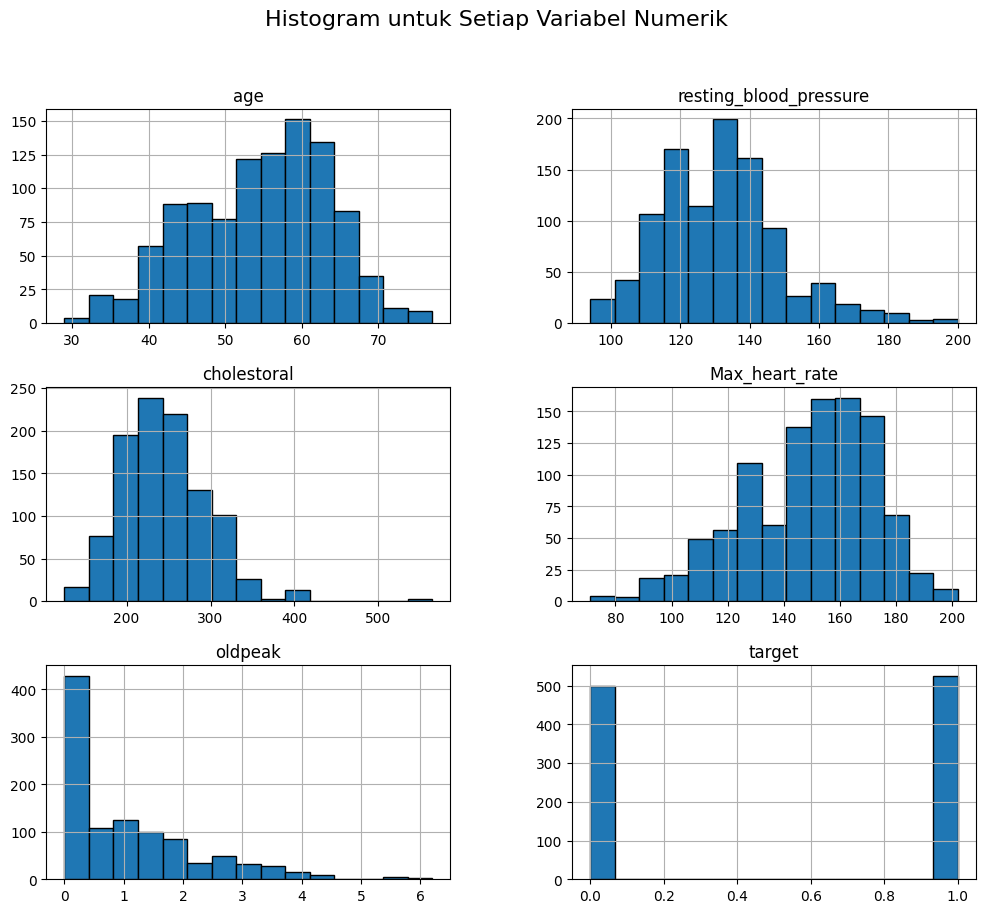

In [10]:
# Membuat histogram untuk setiap variabel numerik
df_numerik.hist(figsize=(12, 10), bins=15, edgecolor='black')
plt.suptitle("Histogram untuk Setiap Variabel Numerik", fontsize=16)
plt.show()


<Figure size 1200x800 with 0 Axes>

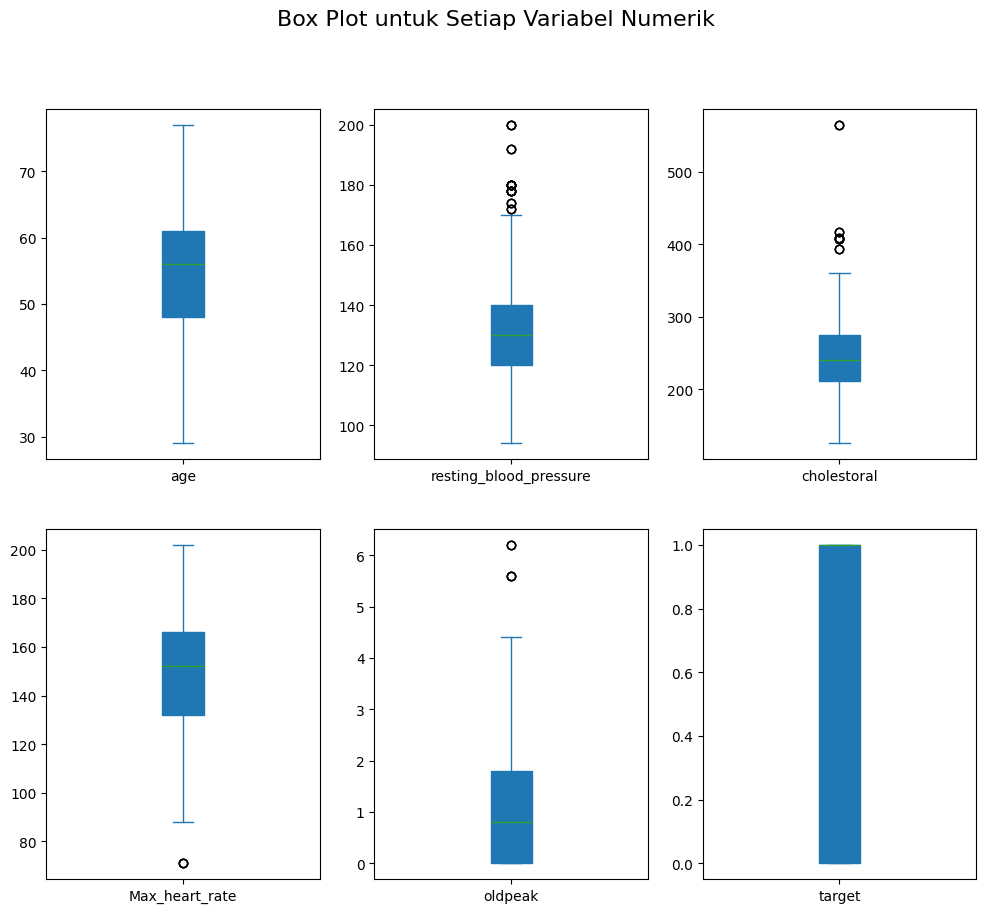

In [11]:
# Membuat box plot untuk setiap variabel numerik
plt.figure(figsize=(12, 8))
df_numerik.plot(kind='box', subplots=True, layout=(2, 3), figsize=(12, 10), patch_artist=True)
plt.suptitle("Box Plot untuk Setiap Variabel Numerik", fontsize=16)
plt.show()


Pasangan variabel dengan korelasi tertinggi: ('Max_heart_rate', 'target')


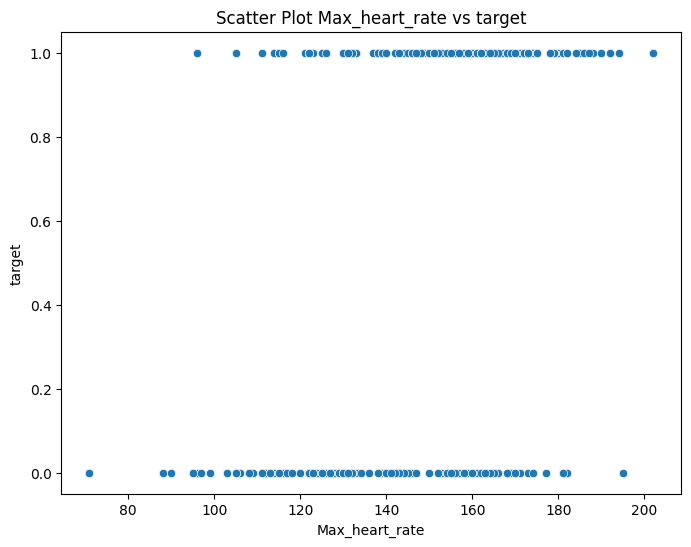

In [15]:
# Menemukan pasangan variabel dengan korelasi tertinggi (selain korelasi diri sendiri)
correlation_unstacked = correlation_matrix.unstack()
sorted_correlation = correlation_unstacked.sort_values(kind="quicksort", ascending=False)

# Mengambil pasangan variabel dengan korelasi tertinggi (selain diagonal)
highest_correlation = sorted_correlation[(sorted_correlation < 1)].idxmax()

# Menampilkan pasangan variabel dengan korelasi tertinggi
print(f"Pasangan variabel dengan korelasi tertinggi: {highest_correlation}")

# Membuat scatter plot dari pasangan variabel dengan korelasi tertinggi
plt.figure(figsize=(8, 6))
sns.scatterplot(x=df_numerik[highest_correlation[0]], y=df_numerik[highest_correlation[1]])
plt.title(f"Scatter Plot {highest_correlation[0]} vs {highest_correlation[1]}")
plt.xlabel(highest_correlation[0])
plt.ylabel(highest_correlation[1])
plt.show()

In [30]:
print("NAMA	: ANGGUN SUCI SALSABILA, NIM : 09011382328143, KELAS : SKU3A, MATA KULIAH: DATA MINING ")
print(" ")
print("Data yang saya ambil adalah data penyakit jantung, data ini memuat 1025 data entri dan 14 kolom, tidak ada data missing, untuk nilai outlier atau nilai yang berbeda dari nilai yang lain ada di data resting_blood_pressure, cholestrole, max_heart_rate, oldpeak. Dari data-data tersebut bisa kita dapat menyimpulkan bahwa kebanyakkan penderita sakit jantung berada di rentang umur 50-70 tahun, tekanan darah penderita penyakit jantung berada di rentang 110-150 dan itu termasuk ke dalam klaster darah tinggi, untuk data kolestrol kebanyakkan penderita penyakit jantung memiliki kolestrol tinggi yaitu berada di rentang 100-300,  laporan ini sederhananya bercerita tentang data apa saja yang berpengaruh terhadap penyakit jantung untuk data yang berpengaruh tersebut adalah data numerik nya.")
print(" ")
print(" ")
print("Distribusi data dalam dataset ini tidak normal, karena skewness nya adalah left-skewness (Distribusi data condong ke kanan, dengan ekor yang lebih panjang di sebelah kiri) Skewness negatif menunjukkan bahwa sebagian besar data berkumpul di bagian kanan distribusi, dengan beberapa nilai ekstrem di bagian kiri yang menyebabkan ekor distribusi lebih panjang di sisi kiri. Dalam interpretasi statistik, skewness negatif menunjukkan bahwa rata-rata (mean) lebih kecil daripada median dan modus, lalu data ini merupakan data yang tidak terdistribusi dengan normal karena menghasilkan kurtosis negatif, menunjukkan distribusi dengan puncak yang lebih datar dan ekor yang kurang ekstrem dibandingkan dengan distribusi normal. Data lebih tersebar di sekitar mean, dan nilai-nilai ekstrem (outliers) kurang umum. Dalam analisis statistik, kurtosis negatif dapat mengindikasikan bahwa data memiliki variabilitas tinggi di sekitar mean tetapi tanpa nilai yang sangat jauh dari rata-rata. Korelasi yang kuat.")

NAMA	: ANGGUN SUCI SALSABILA, NIM : 09011382328143, KELAS : SKU3A, MATA KULIAH: DATA MINING 
 
Data yang saya ambil adalah data penyakit jantung, data ini memuat 1025 data entri dan 14 kolom, tidak ada data missing, untuk nilai outlier atau nilai yang berbeda dari nilai yang lain ada di data resting_blood_pressure, cholestrole, max_heart_rate, oldpeak. Dari data-data tersebut bisa kita dapat menyimpulkan bahwa kebanyakkan penderita sakit jantung berada di rentang umur 50-70 tahun, tekanan darah penderita penyakit jantung berada di rentang 110-150 dan itu termasuk ke dalam klaster darah tinggi, untuk data kolestrol kebanyakkan penderita penyakit jantung memiliki kolestrol tinggi yaitu berada di rentang 100-300,  laporan ini sederhananya bercerita tentang data apa saja yang berpengaruh terhadap penyakit jantung untuk data yang berpengaruh tersebut adalah data numerik nya.
 
 
Distribusi data dalam dataset ini tidak normal, karena skewness nya adalah left-skewness (Distribusi data condong